## Installing & importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
### new
import numpy as np
import seaborn as sns

## 1. Download stock price & plot candlestick chart

In [28]:
# download stock price data
Company = 'META'
df = yf.download(Company, period='3mo') #1y,1mo
#df = yf.download(company, start=startDate, end=endDate)

[*********************100%%**********************]  1 of 1 completed


## 2. Add MACD & stochastics as subplot

In [3]:
# Add MACD as subplot
def MACD(df, window_slow, window_fast, window_signal):
    macd = pd.DataFrame()
    macd['ema_slow'] = df['Close'].ewm(span=window_slow).mean()
    macd['ema_fast'] = df['Close'].ewm(span=window_fast).mean()
    macd['macd'] = macd['ema_slow'] - macd['ema_fast']
    macd['signal'] = macd['macd'].ewm(span=window_signal).mean()
    macd['diff'] = macd['macd'] - macd['signal']
    macd['bar_positive'] = macd['diff'].map(lambda x: x if x > 0 else 0)
    macd['bar_negative'] = macd['diff'].map(lambda x: x if x < 0 else 0)
    return macd


In [4]:
def Stochastic(df, window, smooth_window):
    stochastic = pd.DataFrame()
    stochastic['%K'] = ((df['Close'] - df['Low'].rolling(window).min()) \
                        / (df['High'].rolling(window).max() - df['Low'].rolling(window).min())) * 100
    stochastic['%D'] = stochastic['%K'].rolling(smooth_window).mean()
    stochastic['%SD'] = stochastic['%D'].rolling(smooth_window).mean()
    stochastic['UL'] = 80
    stochastic['DL'] = 20
    return stochastic



## 3. Result

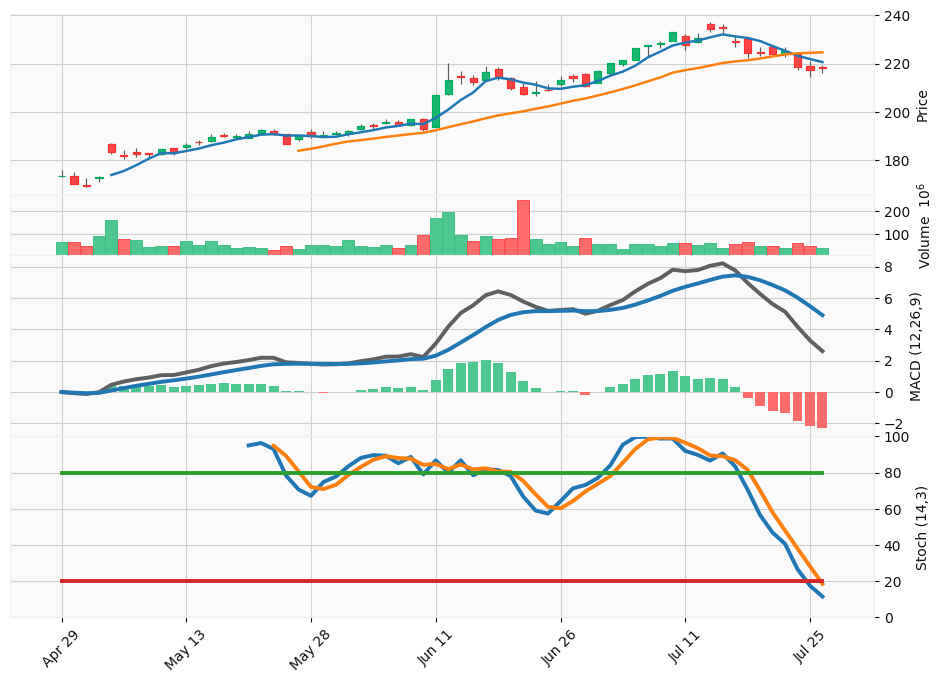

In [11]:
macd = MACD(df, 12, 26, 9)
stochastic = Stochastic(df, 14, 3)
plots  = [
    mpf.make_addplot((macd['macd']), color='#606060', panel=2, ylabel='MACD (12,26,9)', secondary_y=False),
    mpf.make_addplot((macd['signal']), color='#1f77b4', panel=2, secondary_y=False),
    mpf.make_addplot((macd['bar_positive']), type='bar', color='#4dc790', panel=2),
    mpf.make_addplot((macd['bar_negative']), type='bar', color='#fd6b6c', panel=2),
    mpf.make_addplot((stochastic[['%D', '%SD', 'UL', 'DL']]),
                     ylim=[0, 100], panel=3, ylabel='Stoch (14,3)')
]
mpf.plot(df, type='candle', style='yahoo', mav=(5,20), volume=True, addplot=plots, panel_ratios=(3,1,3,3), figscale=1.5)

[*********************100%%**********************]  4 of 4 completed


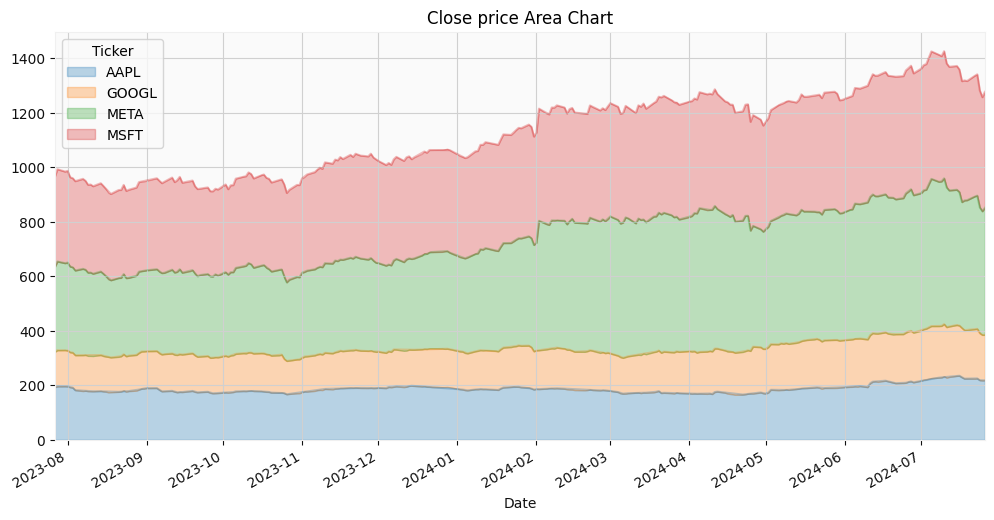

In [22]:
# Define the companies and period
companies = ['AAPL', 'MSFT', 'GOOGL', 'META']  # Replace with your companies
period = '1y'

# Download the stock price data
df = yf.download(companies, period=period)


df['Close'].plot(kind='area', figsize=(12, 6), alpha=0.3)
plt.title('Close price Area Chart')
plt.grid(True)

# Get the minimum and maximum dates from your DataFrame's index
min_date = df.index.min()
max_date = df.index.max()
# Set the x-axis limits to show all days in the data
plt.xlim(min_date, max_date)
plt.show()


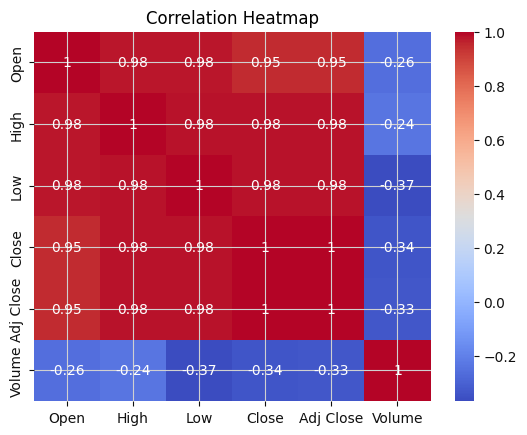

In [29]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


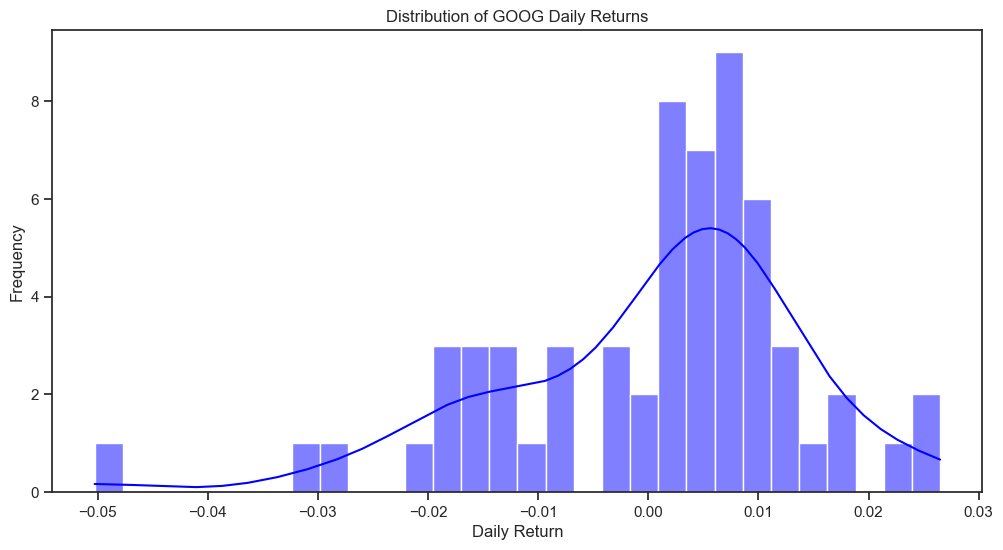

In [28]:

# Seaborn style set
sns.set( style='ticks')

# Distribution of Daily Returns
plt.figure(figsize=(12, 6))
sns.histplot(df['Adj Close'].pct_change().dropna(), bins=30, kde=True, color='blue')
plt.title(f'Distribution of {symbol} Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

[*********************100%%**********************]  3 of 3 completed


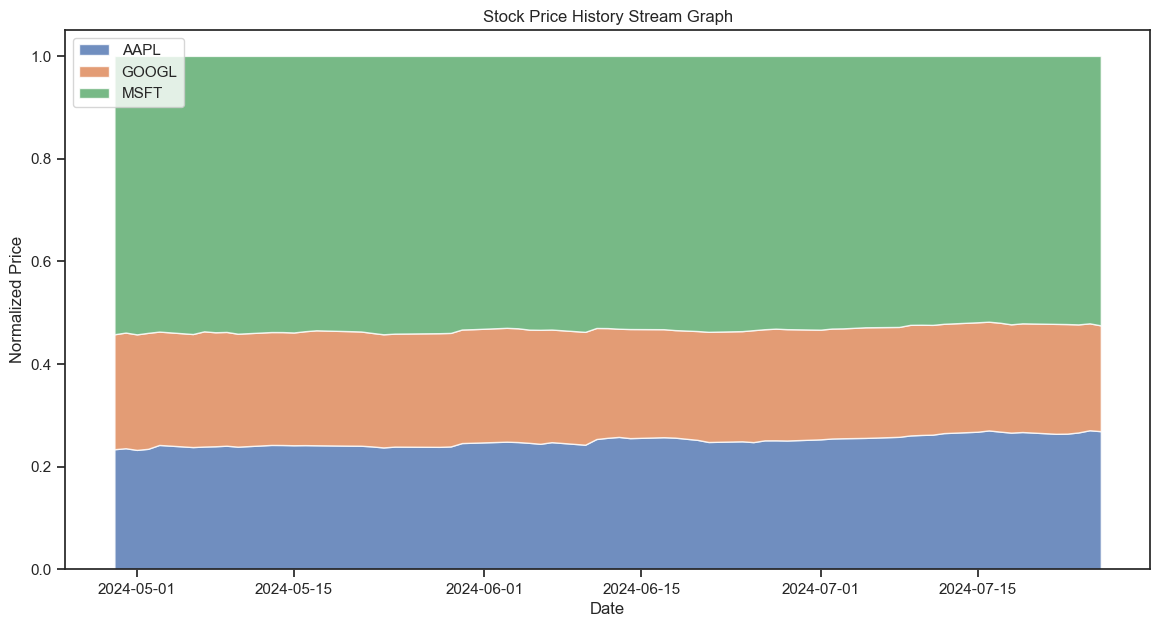

In [36]:
# Define the companies and period
companies = ['AAPL', 'MSFT', 'GOOGL']  # Replace with your companies
period = '3mo'

# Download the stock price data
df = yf.download(companies, period=period)['Close']

# Normalize the data for better visualization
df_normalized = df.div(df.sum(axis=1), axis=0)

# Plotting the stream graph
fig, ax = plt.subplots(figsize=(14, 7))

# Stacked area plot for the stream graph effect
ax.stackplot(df_normalized.index, df_normalized.T, labels=df.columns, alpha=0.8)

# Adding legend and labels
ax.legend(loc='upper left')
ax.set_title('Stock Price History Stream Graph')
ax.set_xlabel('Date')
ax.set_ylabel('Normalized Price')

plt.show()

[*********************100%%**********************]  3 of 3 completed


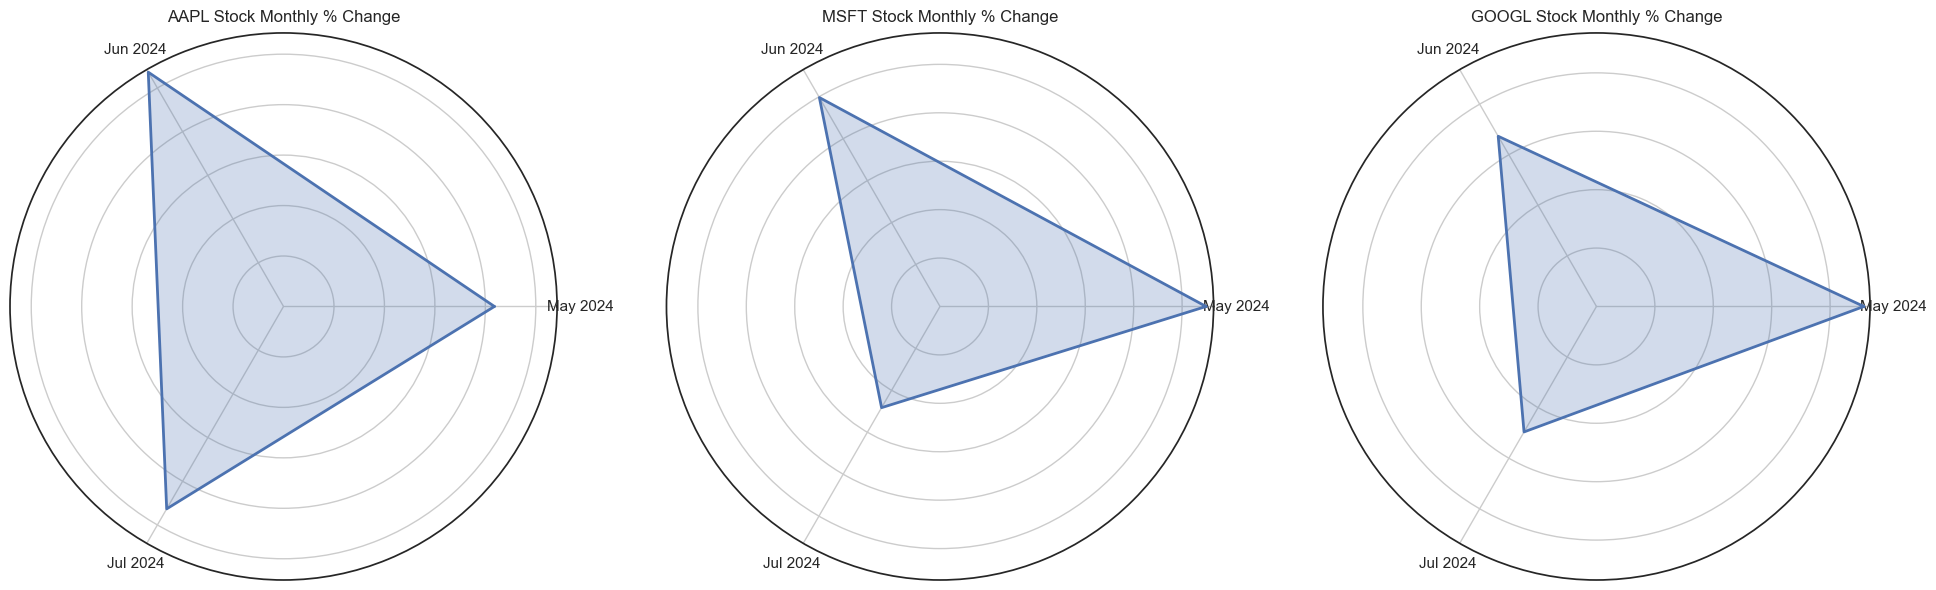

In [39]:

# Define the companies and period
companies = ['AAPL', 'MSFT', 'GOOGL']  # Replace with your companies
period = '3mo'

# Download the stock price data
df = yf.download(companies, period=period)['Close']

# Resample data to monthly average for better aggregation
df_monthly = df.resample('ME').mean()

# Calculate the percentage change to visualize
df_monthly_change = df_monthly.pct_change().dropna() * 100

# Plotting the Nightingale Rose Chart for each company
fig, axes = plt.subplots(1, len(companies), figsize=(8 * len(companies), 8), subplot_kw=dict(polar=True))

for i, company in enumerate(companies):
    ax = axes[i] if len(companies) > 1 else axes
    values = df_monthly_change[company].tolist()
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()

    # Close the plot to make a complete circle
    angles += angles[:1]
    values += values[:1]

    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values, linewidth=2)

    # Adding labels and title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(df_monthly_change.index.strftime('%b %Y'))
    ax.set_yticklabels([])  # Hide the y-axis labels
    ax.set_title(f'{company} Stock Monthly % Change', va='bottom')

plt.show()
